## EDA on Eye fundus Image dataset from Kaggle

Author: Mridul Ahluwalia

In [1]:
import os
import cv2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Initializing Notebook

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Load Dataset

In [92]:
DATA_PATH = '../data/'
IMG_RAW_TRAIN_PATH = '../data/raw/Training Images/'
METADATA_FILE = 'metadata/full_df.csv'

metadata_file = os.path.join(DATA_PATH, METADATA_FILE)
metadata_file

'../data/metadata/full_df.csv'

In [93]:
metadata_df = pd.read_csv(metadata_file)
metadata_df.head() 

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
metadata_df[(metadata_df["ID"] == 2)]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


In [94]:
metadata_df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
metadata_df.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

## General Analysis

•	Normal (N)

•	Glaucoma (G)

•	Diabetes (D)

•	Hypertension (H)

•	Cataract (C)

•	Pathological Myopia (M)

•	Age-related Macular Degeneration (A)

•	Other diseases/abnormalities (O)

In [6]:
# Total images
metadata_df["labels"].count()

6392

In [7]:
# Actual number of images for each eye condition
metadata_df["labels"].value_counts()

['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: labels, dtype: int64

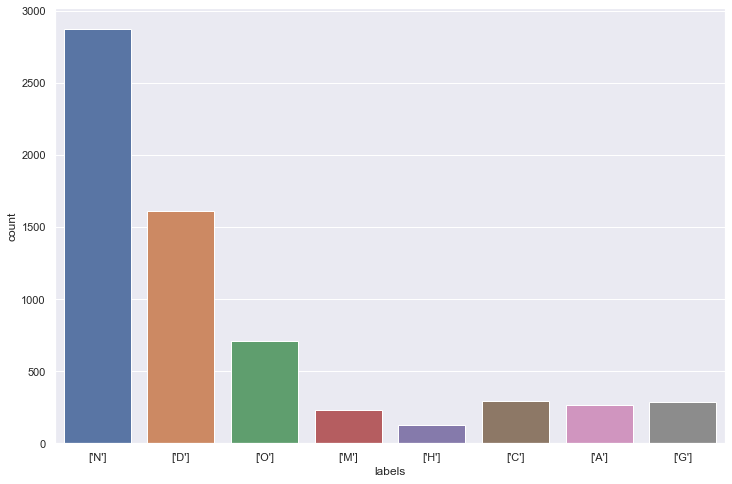

In [80]:
pie, ax = plt.subplots(figsize=[12,8])
sns.countplot(x="labels", data=metadata_df)
plt.show()

In [8]:
# Number of images for each eye condition
metadata_df[["N", "D", "G", "C", "A", "H", "M", "O"]].sum()

N    2101
D    2123
G     397
C     402
A     319
H     203
M     306
O    1588
dtype: int64

In [9]:
# Actual percentage of data rows for each eye condition
label_distribution = round(100*metadata_df["labels"].value_counts()/metadata_df.shape[0], 2)
label_distribution

['N']    44.95
['D']    25.16
['O']    11.08
['C']     4.58
['G']     4.44
['A']     4.16
['M']     3.63
['H']     2.00
Name: labels, dtype: float64

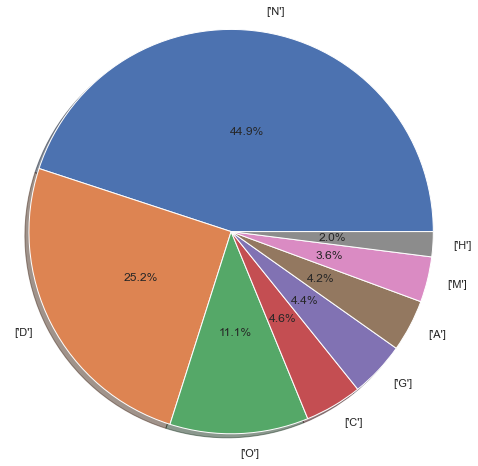

In [90]:
# Pie chart of total expense
data = label_distribution
pie, ax = plt.subplots(figsize=[8,8])
explode = [0 for i in range(data.shape[0])]
fig = plt.pie(
    x=data, 
    autopct="%.1f%%", 
    labels=data.index, 
    pctdistance=0.5,
    shadow=True, 
    explode=explode)
ax.axis('equal')
plt.title("Data Label Distribution (Percentage)\n", fontsize=14);
plt.show()

In [11]:
# Percentage of data rows for each eye condition
round(100*metadata_df[["N", "D", "G", "C", "A", "H", "M", "O"]].sum()/metadata_df.shape[0], 2)

N    32.87
D    33.21
G     6.21
C     6.29
A     4.99
H     3.18
M     4.79
O    24.84
dtype: float64

In [12]:
# Unique keywords
def fetch_unique_keywords(df, col):
    unique_keywords = list()
    for sent in df[col]:
        sent = sent.replace('，', ',')
        for words in sent.split(','):
            unique_keywords.append(words.strip())
    return set(unique_keywords)

unique_keywords_right = fetch_unique_keywords(metadata_df, "Right-Diagnostic Keywords")
unique_keywords_left = fetch_unique_keywords(metadata_df, "Left-Diagnostic Keywords")
unique_keywords_org = unique_keywords_right.union(unique_keywords_left)
print(len(unique_keywords_org))
unique_keywords_org

94


{'abnormal pigment',
 'age-related macular degeneration',
 'anterior segment image',
 'arteriosclerosis',
 'atrophic change',
 'atrophy',
 'branch retinal artery occlusion',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'central retinal vein occlusion',
 'central serous chorioretinopathy',
 'chorioretinal atrophy',
 'chorioretinal atrophy with pigmentation proliferation',
 'choroidal nevus',
 'congenital choroidal coloboma',
 'depigmentation of the retinal pigment epithelium',
 'diabetic retinopathy',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'glial remnants anterior to the optic disc',
 'hypertensive retinopathy',
 'idiopathic choroidal neovascularization',
 'image offset',
 'intraretinal hemorrhage',
 'intraretinal microvascular abnormality',
 'laser spot',
 

## Image Analysis

(2304, 3456, 3)


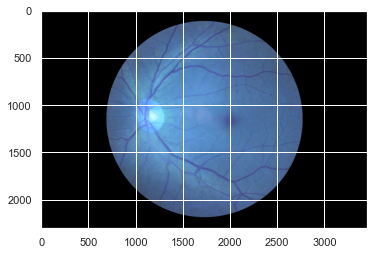

In [13]:
img = '1_left.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
plt.imshow(image)
print(image.shape)

(2304, 3456, 3)


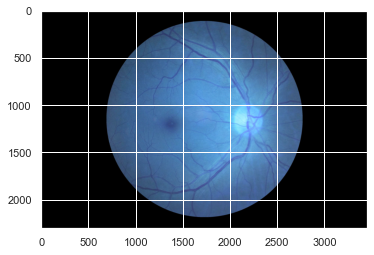

In [14]:
img = '1_right.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
plt.imshow(image)
print(image.shape)

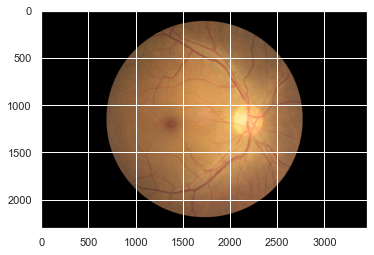

In [15]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)

## Format DataFrame

In [16]:
metadata_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [17]:
# main_df = metadata_df.drop(["N", "D", "G", "C", "A", "H", "M", "O", "filepath", "target", "Left-Fundus", "Right-Fundus"], axis=1)
# Dropping columns which are not required
main_df = metadata_df.drop(["filepath", "target", "Left-Fundus", "Right-Fundus"], axis=1)
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],2_right.jpg
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],4_right.jpg
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg


In [18]:
# Labeling direction of eye
main_df["Eye Side"] = main_df["filename"].apply(lambda val: "right" if "right" in val else "left")
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg,right
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg,right
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],2_right.jpg,right
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],4_right.jpg,right
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg,right


In [19]:
def update_correct_diagnostic(row):
    if row["Eye Side"] == 'right':
        return row["Right-Diagnostic Keywords"]
    else:
        return row["Left-Diagnostic Keywords"]

main_df["Diagnostic Keywords"] = main_df.apply(lambda row: update_correct_diagnostic(row), axis=1)
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],0_right.jpg,right,normal fundus
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],1_right.jpg,right,normal fundus
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],2_right.jpg,right,moderate non proliferative retinopathy
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],4_right.jpg,right,mild nonproliferative retinopathy
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],5_right.jpg,right,moderate non proliferative retinopathy


In [20]:
# main_df = main_df.drop(["Left-Diagnostic Keywords", "Right-Diagnostic Keywords"], axis=1)
# main_df.head()

In [21]:
# All the lables are unique and correspond to one diagnosis
main_df["labels"].unique()

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

In [22]:
main_df["labels"] = main_df["labels"].apply(lambda val: val[2])
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy


In [23]:
main_df["diagnosis_count"] = main_df.apply(lambda row: row[["N", "D", "G", "C", "A", "H", "M", "O"]].sum(), axis=1)
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1


In [24]:
len(main_df["ID"].unique())

3358

In [25]:
main_df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436,1.163798
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139,0.389083
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [26]:
unique_keywords = fetch_unique_keywords(main_df, "Diagnostic Keywords")
print(len(unique_keywords))
unique_keywords

60


{'abnormal pigment',
 'age-related macular degeneration',
 'atrophic change',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'central retinal vein occlusion',
 'chorioretinal atrophy',
 'choroidal nevus',
 'diabetic retinopathy',
 'diffuse chorioretinal atrophy',
 'diffuse retinal atrophy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'hypertensive retinopathy',
 'intraretinal hemorrhage',
 'laser spot',
 'lens dust',
 'low image quality',
 'macular epiretinal membrane',
 'macular pigmentation disorder',
 'maculopathy',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'myopia retinopathy',
 'myopic maculopathy',
 'normal fundus',
 'old branch retinal vein occlusion',
 'old central retinal vein occlusion',
 'optic disc edema',
 'optic disk epiretinal membrane',
 'opt

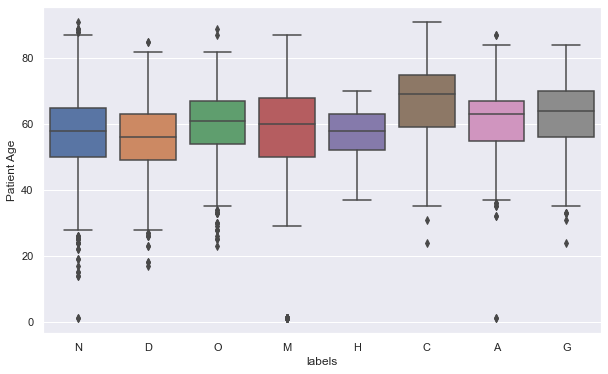

In [27]:
# Distribution of Patient Age per Label
chart, ax = plt.subplots(figsize=[10,6])
sns.boxplot(x="labels", y="Patient Age", data=main_df)
plt.show()

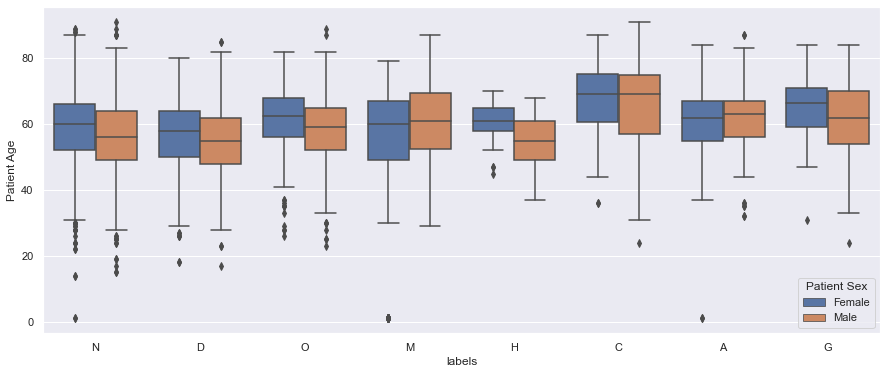

In [28]:
# Distribution of Patient Sex per Label
chart, ax = plt.subplots(figsize=[15,6])
sns.boxplot(x="labels", y="Patient Age", hue="Patient Sex", data=main_df)
plt.show()

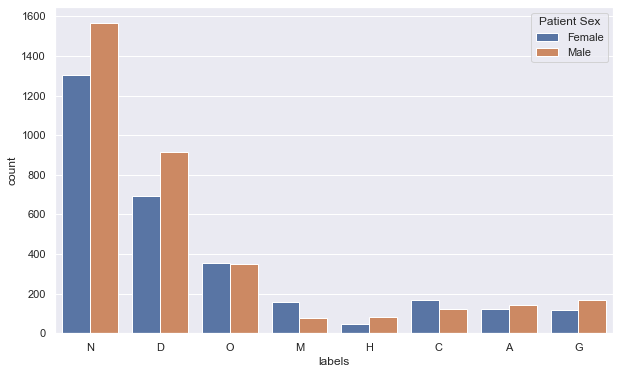

In [29]:
# Count of Pateint Sex per Label
chart, ax = plt.subplots(figsize=[10,6])
sns.countplot(x="labels", hue="Patient Sex", data=main_df)
plt.show()

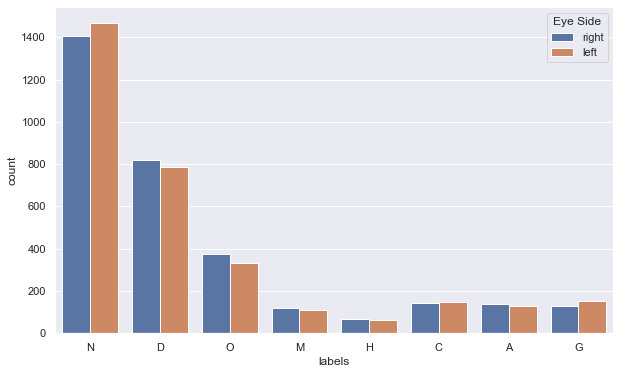

In [30]:
# Count of Eye Side per Label
chart, ax = plt.subplots(figsize=[10,6])
sns.countplot(x="labels", hue="Eye Side", data=main_df)
plt.show()

## Image Size

right eye image size: (2000, 2584, 3)
left eye image size: (2000, 2584, 3)


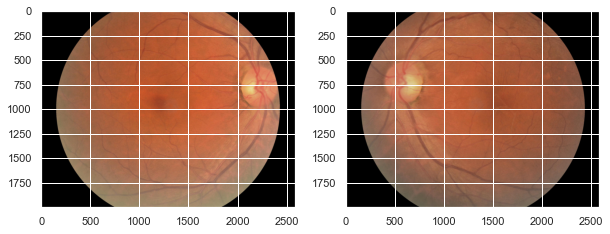

In [31]:
image_num = 10
chart, ax = plt.subplots(figsize=[10,6])

plt.subplot(1, 2, 1)
img = f'{image_num}_right.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)
print(f"right eye image size: {image.shape}")

plt.subplot(1, 2, 2)
img = f'{image_num}_left.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)
print(f"left eye image size: {image.shape}")

In [32]:
main_df.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1


In [33]:
# Get image size for each fundus image
# main_df["Image Size"] = main_df["filename"].apply(lambda val: cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, val)).shape)
# main_df.head()

In [34]:
# main_df.to_csv('updated_metadata.csv')

In [35]:
main_df = pd.read_csv('updated_metadata.csv')

In [36]:
main_df["height"] = main_df["Image Size"].apply(lambda val: int(val[1:-1].split(', ')[0]))
main_df["width"] = main_df["Image Size"].apply(lambda val: int(val[1:-1].split(', ')[1]))
main_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square
0,0,0,0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1,"(1728, 2304, 3)",1728,2304,0,1,0
1,1,1,1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1,"(2304, 3456, 3)",2304,3456,0,1,0
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0


### Image Orientation

In [37]:
main_df["is_vertical"] = main_df[["height", "width"]].apply(lambda row: 1 if row.height > row.width else 0, axis=1)
main_df["is_horizontal"] = main_df[["height", "width"]].apply(lambda row: 1 if row.height < row.width else 0, axis=1)
main_df["is_square"] = main_df[["height", "width"]].apply(lambda row: 1 if row.height == row.width else 0, axis=1)
main_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square
0,0,0,0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1,"(1728, 2304, 3)",1728,2304,0,1,0
1,1,1,1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1,"(2304, 3456, 3)",2304,3456,0,1,0
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0


In [38]:
main_df[["is_vertical", "is_horizontal", "is_square"]].sum()

is_vertical       101
is_horizontal    5853
is_square         438
dtype: int64

In [39]:
# Diffenece in size when image is vertical
main_df[(main_df["is_vertical"] == 1)].apply(lambda row: row.height - row.width, axis=1)

240     2
290     2
391     2
448     2
479     2
480     2
516     2
853     2
933     2
997     2
1046    2
1124    2
1140    2
1210    2
1227    2
1279    1
1349    2
1465    7
1466    4
1481    2
1482    2
1483    2
1484    2
1485    2
1486    2
1487    2
1637    2
1853    2
1891    2
1895    2
1921    2
1940    2
1943    2
1973    2
2093    2
2118    2
2228    2
2344    2
2513    2
2520    2
2549    2
2674    2
2704    2
2771    2
2847    2
2895    2
2955    2
3004    2
3024    2
3049    2
3126    2
3148    2
3432    2
3483    2
3580    2
3634    2
3664    2
3665    2
3702    2
4136    2
4197    2
4243    4
4319    2
4337    2
4405    2
4470    2
4538    2
4657    1
4658    2
4673    2
4674    2
4675    2
4676    2
4677    2
4678    2
4679    2
4831    2
5045    2
5085    2
5114    2
5133    2
5136    2
5167    2
5283    2
5290    2
5309    2
5419    2
5536    3
5704    2
5711    2
5739    2
5866    2
5897    2
5966    2
6045    2
6093    2
6154    2
6221    2
6246    2
6323    2


In [40]:
main_df[(main_df["is_vertical"] == 1)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square
240,240,240,240,277,75,Male,normal fundus,drusen,0,0,0,0,0,0,0,1,O,277_right.jpg,right,drusen,1,"(1382, 1380, 3)",1382,1380,1,0,0
290,290,290,290,334,74,Female,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,0,1,0,0,0,A,334_right.jpg,right,dry age-related macular degeneration,1,"(1382, 1380, 3)",1382,1380,1,0,0
391,391,391,391,448,68,Male,cataract,moderate non proliferative retinopathy,0,1,0,1,0,0,0,0,D,448_right.jpg,right,moderate non proliferative retinopathy,2,"(1382, 1380, 3)",1382,1380,1,0,0
448,448,448,448,514,67,Male,dry age-related macular degeneration,wet age-related macular degeneration,0,0,0,0,1,0,0,0,A,514_right.jpg,right,wet age-related macular degeneration,1,"(1382, 1380, 3)",1382,1380,1,0,0
479,479,479,479,549,70,Female,moderate non proliferative retinopathy，white vessel,normal fundus,0,1,0,0,0,0,0,1,N,549_right.jpg,right,normal fundus,2,"(1382, 1380, 3)",1382,1380,1,0,0
480,480,480,480,550,55,Male,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,550_right.jpg,right,moderate non proliferative retinopathy,1,"(1382, 1380, 3)",1382,1380,1,0,0
516,516,516,516,591,62,Male,normal fundus,epiretinal membrane over the macula,0,0,0,0,0,0,0,1,O,591_right.jpg,right,epiretinal membrane over the macula,1,"(1382, 1380, 3)",1382,1380,1,0,0
853,853,853,853,993,69,Male,laser spot，moderate non proliferative retinopathy,macular epiretinal membrane，laser spot，lens dust，mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,O,993_right.jpg,right,macular epiretinal membrane，laser spot，lens dust，mild nonproliferative retinopathy,2,"(2416, 2414, 3)",2416,2414,1,0,0
933,933,933,933,1118,47,Female,normal fundus,maculopathy,0,0,0,0,0,0,0,1,O,1118_right.jpg,right,maculopathy,1,"(2416, 2414, 3)",2416,2414,1,0,0
997,997,997,997,1220,58,Female,glaucoma,glaucoma,0,0,1,0,0,0,0,0,G,1220_right.jpg,right,glaucoma,1,"(1382, 1380, 3)",1382,1380,1,0,0


(1472, 1468, 3)


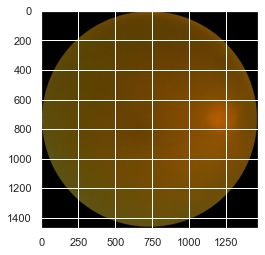

In [41]:
img = '2198_right.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)
print(image_rgb.shape)

In [42]:
# main_df["height"] = main_df["Image Size"].apply(lambda val: val[0])
# main_df["width"] = main_df["Image Size"].apply(lambda val: val[1])
# main_df.head()

In [43]:
main_df[["height", "width"]].describe([0.01, 0.05, .10, .25, .75, .90, .95, .99])

,height,width
count,6392.000000,6392.000000
mean,1806.151909,2464.318210
std,421.374761,612.072777
min,188.000000,250.000000
1%,894.000000,1380.000000
5%,1152.000000,1444.000000
10%,1296.000000,1624.000000
25%,1632.000000,2048.000000
50%,1728.000000,2592.000000
75%,1944.000000,2592.000000


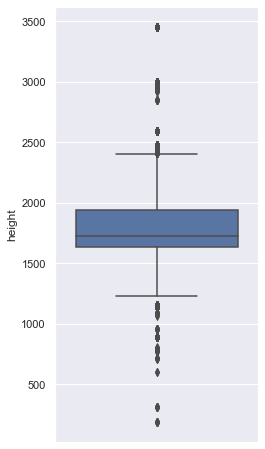

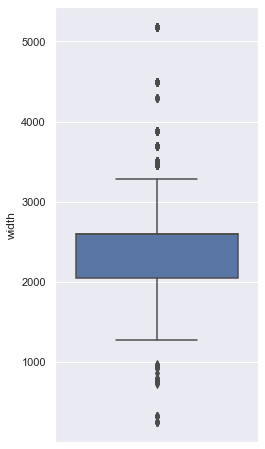

In [44]:
chart, ax = plt.subplots(figsize=[8,8])

plt.subplot(1, 2, 1)
sns.boxplot(y="height", data=main_df)
plt.show()

chart, ax = plt.subplots(figsize=[8,8])

plt.subplot(1, 2, 2)
sns.boxplot(y="width", data=main_df)
plt.show()

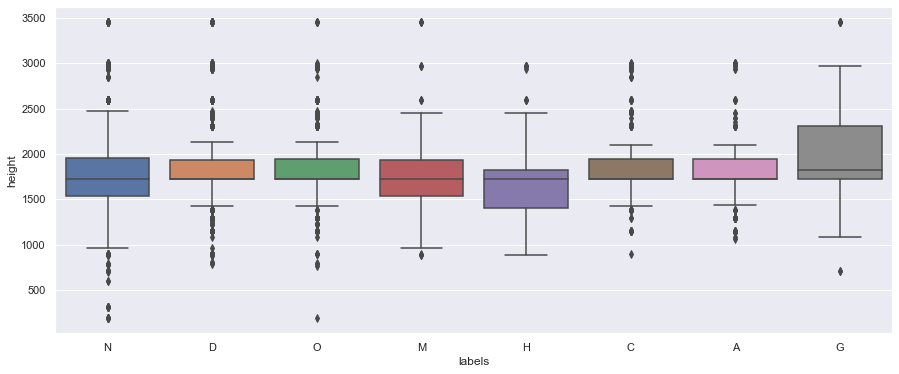

In [45]:
chart, ax = plt.subplots(figsize=[15,6])
sns.boxplot(x="labels", y="height", data=main_df)
plt.show()

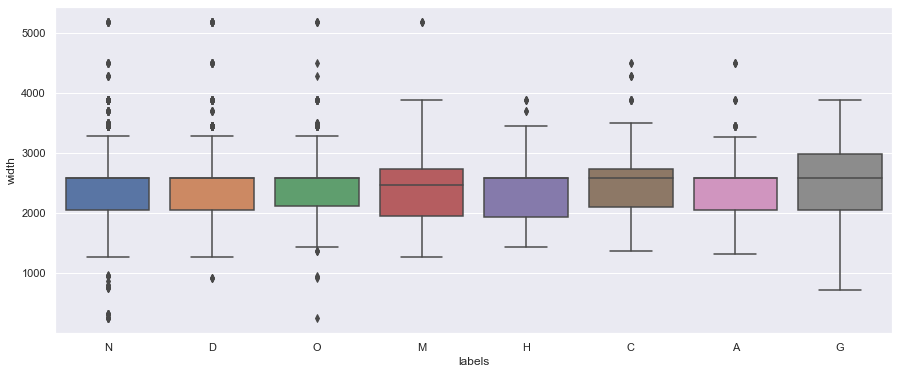

In [46]:
chart, ax = plt.subplots(figsize=[15,6])
sns.boxplot(x="labels", y="width", data=main_df)
plt.show()

In [47]:
# Flag images below certain height and width value
threshold = 512
main_df["Flag"] = main_df.apply(lambda row: 1 if (row["height"] < threshold) or (row["width"] < threshold) else 0, axis=1)
main_df["Flag"].sum()

18

In [48]:
main_df[(main_df["Flag"]==1)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
75,75,75,75,91,28,Male,normal fundus,myelinated nerve fibers,0,0,0,0,0,0,0,1,O,91_right.jpg,right,myelinated nerve fibers,1,"(188, 250, 3)",188,250,0,1,0,1
366,366,366,366,418,51,Female,chorioretinal atrophy with pigmentation proliferation,normal fundus,0,0,0,0,0,0,0,1,N,418_right.jpg,right,normal fundus,1,"(188, 250, 3)",188,250,0,1,0,1
1665,1665,1665,1665,2497,45,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,2497_right.jpg,right,normal fundus,1,"(316, 320, 3)",316,320,0,1,0,1
1794,1794,1794,1794,2636,51,Female,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,2636_right.jpg,right,normal fundus,1,"(188, 250, 3)",188,250,0,1,0,1
1797,1797,1797,1797,2639,65,Female,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,2639_right.jpg,right,normal fundus,1,"(188, 250, 3)",188,250,0,1,0,1
1899,1899,1899,1899,2755,61,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,2755_right.jpg,right,normal fundus,1,"(316, 320, 3)",316,320,0,1,0,1
2024,2024,2024,2024,2887,49,Female,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,2887_right.jpg,right,normal fundus,1,"(316, 320, 3)",316,320,0,1,0,1
2270,2270,2270,2270,3155,48,Female,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,3155_right.jpg,right,normal fundus,1,"(188, 250, 3)",188,250,0,1,0,1
2409,2409,2409,2409,3305,86,Female,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,3305_right.jpg,right,normal fundus,1,"(316, 320, 3)",316,320,0,1,0,1
3196,3196,3196,3196,3,66,Male,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,N,3_left.jpg,left,normal fundus,1,"(316, 320, 3)",316,320,0,1,0,1


## Normal Fundus Images

In [49]:
N_df = main_df[(main_df["labels"] == "N")]
N_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
0,0,0,0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1,"(1728, 2304, 3)",1728,2304,0,1,0,0
1,1,1,1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1,"(2304, 3456, 3)",2304,3456,0,1,0,0
7,7,7,7,8,59,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,8_right.jpg,right,normal fundus,1,"(2400, 2400, 3)",2400,2400,0,0,1,0
9,9,9,9,10,70,Male,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,N,10_right.jpg,right,normal fundus,1,"(2000, 2584, 3)",2000,2584,0,1,0,0
24,24,24,24,29,59,Male,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,N,29_right.jpg,right,normal fundus,1,"(1728, 2592, 3)",1728,2592,0,1,0,0


In [50]:
N_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.0,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000,2873.000000
mean,3426.647755,3426.647755,3426.647755,2548.176819,57.181692,0.731291,0.087713,0.014619,0.017751,0.007658,0.0,0.009050,0.149321,1.017403,1796.701357,2417.014271,0.013575,0.908458,0.077967,0.005917
std,1746.366721,1746.366721,1746.366721,1052.862594,11.253863,0.443365,0.282927,0.120042,0.132070,0.087187,0.0,0.094715,0.356467,0.130792,415.690207,627.727669,0.115737,0.288428,0.268167,0.076709
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,188.000000,250.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,1943.000000,1943.000000,2390.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1536.000000,2048.000000,0.000000,1.000000,0.000000,0.000000
50%,3288.000000,3288.000000,3288.000000,2786.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1728.000000,2584.000000,0.000000,1.000000,0.000000,0.000000
75%,5138.000000,5138.000000,5138.000000,3173.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1958.000000,2592.000000,0.000000,1.000000,0.000000,0.000000
max,6386.000000,6386.000000,6386.000000,4689.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,3456.000000,5184.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
N_df["Diagnostic Keywords"].unique()

array(['normal fundus', 'normal fundus，lens dust',
       'normal fundus，normal fundus'], dtype=object)

In [52]:
unique_keywords_N = fetch_unique_keywords(N_df, "Diagnostic Keywords")
print(len(unique_keywords_N))
unique_keywords_N

2


{'lens dust', 'normal fundus'}

## Diabetes Fundus Images

In [53]:
D_df = main_df[(main_df["labels"] == "D")]
D_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0,0
5,5,5,5,6,60,Male,macular epiretinal membrane,moderate non proliferative retinopathy，epiretinal membrane,0,1,0,0,0,0,0,1,D,6_right.jpg,right,moderate non proliferative retinopathy，epiretinal membrane,2,"(1728, 2592, 3)",1728,2592,0,1,0,0
6,6,6,6,7,60,Female,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,7_right.jpg,right,mild nonproliferative retinopathy,2,"(1728, 2592, 3)",1728,2592,0,1,0,0


In [54]:
D_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0,1608.0,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0
mean,3668.483209,3668.483209,3668.483209,3105.399876,55.699627,0.0,1.0,0.011194,0.019900,0.011194,0.037313,0.011816,0.189055,1.280473,1799.049129,2500.914801,0.016169,0.921642,0.062189,0.0
std,1947.540483,1947.540483,1947.540483,1736.454250,10.200721,0.0,0.0,0.105241,0.139702,0.105241,0.189588,0.108091,0.391674,0.468356,419.489104,584.787003,0.126165,0.268818,0.241574,0.0
min,2.000000,2.000000,2.000000,2.000000,17.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,788.000000,924.000000,0.000000,0.000000,0.000000,0.0
25%,2694.750000,2694.750000,2694.750000,879.250000,49.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1728.000000,2048.000000,0.000000,1.000000,0.000000,0.0
50%,3173.500000,3173.500000,3173.500000,4117.500000,56.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1728.000000,2592.000000,0.000000,1.000000,0.000000,0.0
75%,5880.250000,5880.250000,5880.250000,4395.250000,63.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1934.000000,2592.000000,0.000000,1.000000,0.000000,0.0
max,6390.000000,6390.000000,6390.000000,4690.000000,85.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3456.000000,5184.000000,1.000000,1.000000,1.000000,0.0


In [55]:
D_df["Diagnostic Keywords"].unique()

array(['moderate non proliferative retinopathy',
       'mild nonproliferative retinopathy',
       'moderate non proliferative retinopathy，epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'moderate non proliferative retinopathy，abnormal pigment ',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，pathological myopia',
       'diabetic retinopathy',
       'moderate non proliferative retinopathy，cataract',
       'moderate non proliferative retinopathy，retinitis pigmentosa',
       'moderate non proliferative retinopathy，white vessel',
       'proliferative diabetic retinopathy，hypertensive retinopathy',
       'severe nonproliferative retinopathy，hypertensive retinopathy',
       'mild nonproliferative retinopathy，myelinated nerve fibers',
       'severe nonproliferative retinopathy',
       'moderate non proliferative retinopathy，spotted membranous change',
       'prolifera

In [56]:
unique_keywords_D = fetch_unique_keywords(D_df, "Diagnostic Keywords")
print(len(unique_keywords_D))
unique_keywords_D

39


{'abnormal pigment',
 'age-related macular degeneration',
 'atrophic change',
 'branch retinal vein occlusion',
 'cataract',
 'central retinal artery occlusion',
 'chorioretinal atrophy',
 'diabetic retinopathy',
 'drusen',
 'dry age-related macular degeneration',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'glaucoma',
 'hypertensive retinopathy',
 'laser spot',
 'lens dust',
 'macular epiretinal membrane',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'old branch retinal vein occlusion',
 'optic disc edema',
 'pathological myopia',
 'post laser photocoagulation',
 'proliferative diabetic retinopathy',
 'refractive media opacity',
 'retina fold',
 'retinal pigment epithelial hypertrophy',
 'retinal pigmentation',
 'retinitis pigmentosa',
 'severe nonproliferative retinopathy',
 'severe proliferative diabetic retinopathy',
 'spotted membranous change',
 'suspected glaucoma',
 'suspected moderate non pro

In [57]:
D2_df = main_df[(main_df["D"] == 1)]
D2_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0,0
5,5,5,5,6,60,Male,macular epiretinal membrane,moderate non proliferative retinopathy，epiretinal membrane,0,1,0,0,0,0,0,1,D,6_right.jpg,right,moderate non proliferative retinopathy，epiretinal membrane,2,"(1728, 2592, 3)",1728,2592,0,1,0,0
6,6,6,6,7,60,Female,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,7_right.jpg,right,mild nonproliferative retinopathy,2,"(1728, 2592, 3)",1728,2592,0,1,0,0


In [58]:
D2_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.0,2123.0,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.0
mean,3568.433349,3568.433349,3568.433349,2896.878474,56.344324,0.0,1.0,0.026378,0.034856,0.015073,0.041922,0.016957,0.234103,1.369289,1798.665097,2502.132360,0.016015,0.925577,0.058408,0.0
std,1972.517033,1972.517033,1972.517033,1784.380252,10.182253,0.0,0.0,0.160294,0.183459,0.121872,0.200458,0.129141,0.423536,0.517588,409.897771,576.171026,0.125563,0.262520,0.234568,0.0
min,2.000000,2.000000,2.000000,2.000000,17.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,784.000000,924.000000,0.000000,0.000000,0.000000,0.0
25%,2654.500000,2654.500000,2654.500000,778.500000,50.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1728.000000,2048.000000,0.000000,1.000000,0.000000,0.0
50%,3197.000000,3197.000000,3197.000000,4067.000000,57.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1728.000000,2592.000000,0.000000,1.000000,0.000000,0.0
75%,5851.500000,5851.500000,5851.500000,4358.000000,64.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1934.000000,2592.000000,0.000000,1.000000,0.000000,0.0
max,6390.000000,6390.000000,6390.000000,4690.000000,85.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3456.000000,5184.000000,1.000000,1.000000,1.000000,0.0


In [59]:
D2_df["labels"].unique()

array(['D', 'O', 'N', 'M', 'A', 'C', 'H', 'G'], dtype=object)

## Other diseases Fundus Images

In [60]:
O_df = main_df[(main_df["labels"] == "O")]
O_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
8,8,8,8,9,54,Male,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,O,9_right.jpg,right,vitreous degeneration,1,"(1536, 2048, 3)",1536,2048,0,1,0,0
12,12,12,12,14,55,Male,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,O,14_right.jpg,right,macular epiretinal membrane,1,"(1728, 2592, 3)",1728,2592,0,1,0,0
13,13,13,13,15,50,Male,normal fundus,myelinated nerve fibers,0,0,0,0,0,0,0,1,O,15_right.jpg,right,myelinated nerve fibers,1,"(2592, 3888, 3)",2592,3888,0,1,0,0
15,15,15,15,17,57,Male,drusen,drusen,0,0,0,0,0,0,0,1,O,17_right.jpg,right,drusen,1,"(1728, 2592, 3)",1728,2592,0,1,0,0
18,18,18,18,21,76,Female,epiretinal membrane,epiretinal membrane,0,0,0,0,0,0,0,1,O,21_right.jpg,right,epiretinal membrane,1,"(1728, 2592, 3)",1728,2592,0,1,0,0


In [61]:
O_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,2077.022599,2077.022599,2077.022599,687.939266,59.607345,0.0,0.190678,0.035311,0.029661,0.009887,0.002825,0.021186,0.995763,1.285311,1826.347458,2528.070621,0.008475,0.932203,0.059322,0.001412
std,1624.330670,1624.330670,1624.330670,485.454092,10.721157,0.0,0.393113,0.184695,0.169770,0.099011,0.053112,0.144107,0.065002,0.461176,395.903376,568.582849,0.091731,0.251574,0.236393,0.037582
min,8.000000,8.000000,8.000000,4.000000,23.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,188.000000,250.000000,0.000000,0.000000,0.000000,0.000000
25%,515.750000,515.750000,515.750000,323.250000,54.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1728.000000,2124.000000,0.000000,1.000000,0.000000,0.000000
50%,1328.500000,1328.500000,1328.500000,644.500000,61.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1728.000000,2592.000000,0.000000,1.000000,0.000000,0.000000
75%,3734.500000,3734.500000,3734.500000,932.250000,67.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1944.000000,2592.000000,0.000000,1.000000,0.000000,0.000000
max,4635.000000,4635.000000,4635.000000,4588.000000,89.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3456.000000,5184.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
O_df["Diagnostic Keywords"].unique()

array(['vitreous degeneration', 'macular epiretinal membrane',
       'myelinated nerve fibers', 'drusen', 'epiretinal membrane',
       'macular epiretinal membrane，moderate non proliferative retinopathy',
       'epiretinal membrane over the macula',
       'macular epiretinal membrane，diabetic retinopathy',
       'drusen，atrophic change',
       'vitreous degeneration，mild nonproliferative retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'refractive media opacity',
       'epiretinal membrane over the macula，moderate non proliferative retinopathy，lens dust',
       'macular epiretinal membrane，lens dust',
       'vitreous degeneration，lens dust', 'epiretinal membrane，lens dust',
       'maculopathy',
       'macular epiretinal membrane，lens dust，moderate non proliferative retinopathy',
       'myelinated nerve fibers，moderate non proliferative retinopathy',
       'myelinated nerve fibers，lens dust', 'myopic maculopathy',
       'drusen，d

In [63]:
unique_keywords_O = fetch_unique_keywords(O_df, "Diagnostic Keywords")
print(len(unique_keywords_O))
unique_keywords_O

30


{'atrophic change',
 'branch retinal vein occlusion',
 'cataract',
 'chorioretinal atrophy',
 'diabetic retinopathy',
 'drusen',
 'epiretinal membrane',
 'epiretinal membrane over the macula',
 'glaucoma',
 'laser spot',
 'lens dust',
 'low image quality',
 'macular epiretinal membrane',
 'maculopathy',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'myopic maculopathy',
 'normal fundus',
 'old branch retinal vein occlusion',
 'optic disk epiretinal membrane',
 'pathological myopia',
 'post laser photocoagulation',
 'refractive media opacity',
 'severe nonproliferative retinopathy',
 'severe proliferative diabetic retinopathy',
 'suspected glaucoma',
 'vessel tortuosity',
 'vitreous degeneration',
 'white vessel'}

## Cataract Fundus Images

In [64]:
C_df = main_df[(main_df["labels"] == "C")]
C_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
20,20,20,20,24,75,Female,normal fundus,cataract,0,0,0,1,0,0,0,0,C,24_right.jpg,right,cataract,1,"(2304, 3456, 3)",2304,3456,0,1,0,0
93,93,93,93,112,57,Female,normal fundus,cataract,0,0,0,1,0,0,0,0,C,112_right.jpg,right,cataract,1,"(1934, 1956, 3)",1934,1956,0,1,0,0
160,160,160,160,188,55,Female,laser spot，severe proliferative diabetic retinopathy,cataract,0,1,0,1,0,0,0,1,C,188_right.jpg,right,cataract,3,"(1296, 1920, 3)",1296,1920,0,1,0,0
186,186,186,186,218,36,Female,refractive media opacity,cataract,0,0,0,1,0,0,0,1,C,218_right.jpg,right,cataract,2,"(1728, 2592, 3)",1728,2592,0,1,0,0
309,309,309,309,354,65,Male,normal fundus,cataract,0,0,0,1,0,0,0,0,C,354_right.jpg,right,cataract,1,"(1728, 2592, 3)",1728,2592,0,1,0,0


In [65]:
C_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.0,293.0,293.0,293.0,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0
mean,2915.590444,2915.590444,2915.590444,1883.965870,66.764505,0.0,0.143345,0.017065,1.0,0.0,0.0,0.0,0.105802,1.266212,1885.453925,2548.873720,0.058020,0.907850,0.034130,0.0
std,1606.666715,1606.666715,1606.666715,579.839207,11.866661,0.0,0.351024,0.129735,0.0,0.0,0.0,0.0,0.308110,0.514301,418.561900,619.961909,0.234182,0.289733,0.181873,0.0
min,20.000000,20.000000,20.000000,0.000000,24.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,894.000000,1380.000000,0.000000,0.000000,0.000000,0.0
25%,1429.000000,1429.000000,1429.000000,2099.000000,59.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,1728.000000,2100.000000,0.000000,1.000000,0.000000,0.0
50%,3411.000000,3411.000000,3411.000000,2147.000000,69.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,1728.000000,2592.000000,0.000000,1.000000,0.000000,0.0
75%,4607.000000,4607.000000,4607.000000,2198.000000,75.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,1944.000000,2736.000000,0.000000,1.000000,0.000000,0.0
max,4701.000000,4701.000000,4701.000000,2282.000000,91.000000,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.000000,3.000000,3000.000000,4496.000000,1.000000,1.000000,1.000000,0.0


In [66]:
C_df["Diagnostic Keywords"].unique()

array(['cataract', 'cataract，branch retinal vein occlusion',
       'cataract，mild nonproliferative retinopathy',
       'cataract，moderate non proliferative retinopathy',
       'cataract，suspected glaucoma', 'cataract，suspected cataract',
       'cataract，laser spot', 'cataract，lens dust',
       'cataract，laser spot，moderate non proliferative retinopathy',
       'cataract，vitreous degeneration',
       'cataract，myelinated nerve fibers，moderate non proliferative retinopathy'],
      dtype=object)

In [67]:
unique_keywords_C = fetch_unique_keywords(C_df, "Diagnostic Keywords")
print(len(unique_keywords_C))
unique_keywords_C

10


{'branch retinal vein occlusion',
 'cataract',
 'laser spot',
 'lens dust',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myelinated nerve fibers',
 'suspected cataract',
 'suspected glaucoma',
 'vitreous degeneration'}

## Glaucoma Fundus Images

In [68]:
G_df = main_df[(main_df["labels"] == "G")]
G_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,Flag
141,141,141,141,167,71,Male,glaucoma,glaucoma,0,0,1,0,0,0,0,0,G,167_right.jpg,right,glaucoma,1,"(1728, 2592, 3)",1728,2592,0,1,0,0
510,510,510,510,583,54,Male,glaucoma,glaucoma,0,0,1,0,0,0,0,0,G,583_right.jpg,right,glaucoma,1,"(1728, 2592, 3)",1728,2592,0,1,0,0
648,648,648,648,746,59,Male,suspected glaucoma，suspicious diabetic retinopathy,suspected glaucoma，suspicious diabetic retinopathy,0,1,1,0,0,0,0,0,G,746_right.jpg,right,suspected glaucoma，suspicious diabetic retinopathy,2,"(1728, 2592, 3)",1728,2592,0,1,0,0
804,804,804,804,931,65,Male,suspected glaucoma，moderate non proliferative retinopathy,suspected glaucoma，moderate non proliferative retinopathy,0,1,1,0,0,0,0,0,G,931_right.jpg,right,suspected glaucoma，moderate non proliferative retinopathy,2,"(1296, 1936, 3)",1296,1936,0,1,0,0
986,986,986,986,1209,69,Female,glaucoma,glaucoma,0,0,1,0,0,0,0,0,G,1209_right.jpg,right,glaucoma,1,"(1536, 2048, 3)",1536,2048,0,1,0,0


In [69]:
G_df.describe([.90, .95, .99])

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,Flag
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.000000,284.0,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.0
mean,2811.105634,2811.105634,2811.105634,1351.573944,63.021127,0.0,0.119718,1.0,0.003521,0.007042,0.031690,0.038732,0.161972,1.362676,1925.823944,2564.147887,0.021127,0.90493,0.073944,0.0
std,1606.671410,1606.671410,1606.671410,257.716374,10.933767,0.0,0.325205,0.0,0.059339,0.083770,0.175483,0.193297,0.369075,0.575238,493.504505,653.195099,0.144061,0.29383,0.262141,0.0
min,141.000000,141.000000,141.000000,95.000000,24.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,713.000000,727.000000,0.000000,0.00000,0.000000,0.0
50%,4191.500000,4191.500000,4191.500000,1313.500000,64.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1824.000000,2592.000000,0.000000,1.00000,0.000000,0.0
90%,4347.700000,4347.700000,4347.700000,1495.000000,76.000000,0.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2480.000000,3456.000000,0.000000,1.00000,0.000000,0.0
95%,4372.850000,4372.850000,4372.850000,1966.700000,79.850000,0.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2935.000000,3504.000000,0.000000,1.00000,1.000000,0.0
99%,4547.510000,4547.510000,4547.510000,2050.550000,84.000000,0.0,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3456.000000,3888.000000,1.000000,1.00000,1.000000,0.0
max,4559.000000,4559.000000,4559.000000,2074.000000,84.000000,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3456.000000,3888.000000,1.000000,1.00000,1.000000,0.0


In [70]:
G_df["Diagnostic Keywords"].unique()

array(['glaucoma', 'suspected glaucoma，suspicious diabetic retinopathy',
       'suspected glaucoma，moderate non proliferative retinopathy',
       'glaucoma，optic nerve atrophy', 'glaucoma，myopia retinopathy',
       'glaucoma，old central retinal vein occlusion',
       'glaucoma，diabetic retinopathy',
       'glaucoma，hypertensive retinopathy',
       'glaucoma，fundus laser photocoagulation spots',
       'glaucoma，macular epiretinal membrane',
       'suspected glaucoma，refractive media opacity',
       'suspected glaucoma',
       'glaucoma，moderate non proliferative retinopathy',
       'glaucoma，moderate non proliferative retinopathy，laser spot',
       'glaucoma，intraretinal hemorrhage',
       'glaucoma，diffuse retinal atrophy',
       'glaucoma，central retinal vein occlusion',
       'suspected glaucoma，mild nonproliferative retinopathy',
       'suspected glaucoma，drusen',
       'glaucoma，mild nonproliferative retinopathy，macular pigmentation disorder',
       'glaucoma，lens

In [71]:
unique_keywords_G = fetch_unique_keywords(G_df, "Diagnostic Keywords")
print(len(unique_keywords_G))
unique_keywords_G

21


{'central retinal vein occlusion',
 'diabetic retinopathy',
 'diffuse retinal atrophy',
 'drusen',
 'fundus laser photocoagulation spots',
 'glaucoma',
 'hypertensive retinopathy',
 'intraretinal hemorrhage',
 'laser spot',
 'lens dust',
 'macular epiretinal membrane',
 'macular pigmentation disorder',
 'mild nonproliferative retinopathy',
 'moderate non proliferative retinopathy',
 'myopia retinopathy',
 'old central retinal vein occlusion',
 'optic nerve atrophy',
 'refractive media opacity',
 'suspected glaucoma',
 'suspicious diabetic retinopathy',
 'wet age-related macular degeneration'}

In [72]:
co = main_df[["N", "D", "G", "C", "A", "H", "M", "O"]]
correlation = co.T.dot(co)
correlation

,N,D,G,C,A,H,M,O
N,2101,0,0,0,0,0,0,0
D,0,2123,56,74,32,89,36,497
G,0,56,397,6,20,15,13,78
C,0,74,6,402,0,4,0,56
A,0,32,20,0,319,8,4,26
H,0,89,15,4,8,203,0,21
M,0,36,13,0,4,0,306,58
O,0,497,78,56,26,21,58,1588


In [73]:
totals = co.sum()
correlation_2 = correlation / totals 
correlation_2.style.background_gradient().set_precision(2)

,N,D,G,C,A,H,M,O
N,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
D,0.00,1.00,0.14,0.18,0.10,0.44,0.12,0.31
G,0.00,0.03,1.00,0.01,0.06,0.07,0.04,0.05
C,0.00,0.03,0.02,1.00,0.00,0.02,0.00,0.04
A,0.00,0.02,0.05,0.00,1.00,0.04,0.01,0.02
H,0.00,0.04,0.04,0.01,0.03,1.00,0.00,0.01
M,0.00,0.02,0.03,0.00,0.01,0.00,1.00,0.04
O,0.00,0.23,0.20,0.14,0.08,0.10,0.19,1.00


In [74]:
main_df[["N", "D", "G", "C", "A", "H", "M", "O"]].corr()

,N,D,G,C,A,H,M,O
N,1.000000,-0.493453,-0.180067,-0.181273,-0.160372,-0.126728,-0.156902,-0.402307
D,-0.493453,1.000000,-0.104401,-0.081437,-0.112809,0.040872,-0.102116,-0.023391
G,-0.180067,-0.104401,1.000000,-0.050645,0.000557,0.008842,-0.018233,-0.030945
C,-0.181273,-0.081437,-0.050645,1.000000,-0.059374,-0.032218,-0.058089,-0.065428
A,-0.160372,-0.112809,0.000557,-0.059374,1.000000,-0.008731,-0.037930,-0.088540
H,-0.126728,0.040872,0.008842,-0.032218,-0.008731,1.000000,-0.040610,-0.060768
M,-0.156902,-0.102116,-0.018233,-0.058089,-0.037930,-0.040610,1.000000,-0.030561
O,-0.402307,-0.023391,-0.030945,-0.065428,-0.088540,-0.060768,-0.030561,1.000000


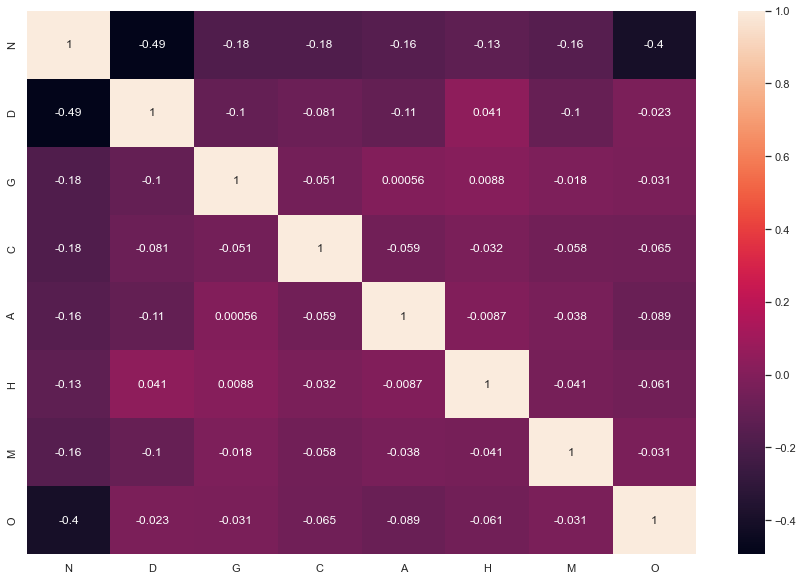

In [75]:
chart, ax = plt.subplots(figsize=[15,10])
sns.heatmap(data=main_df[["N", "D", "G", "C", "A", "H", "M", "O"]].corr(), annot=True)
plt.show()

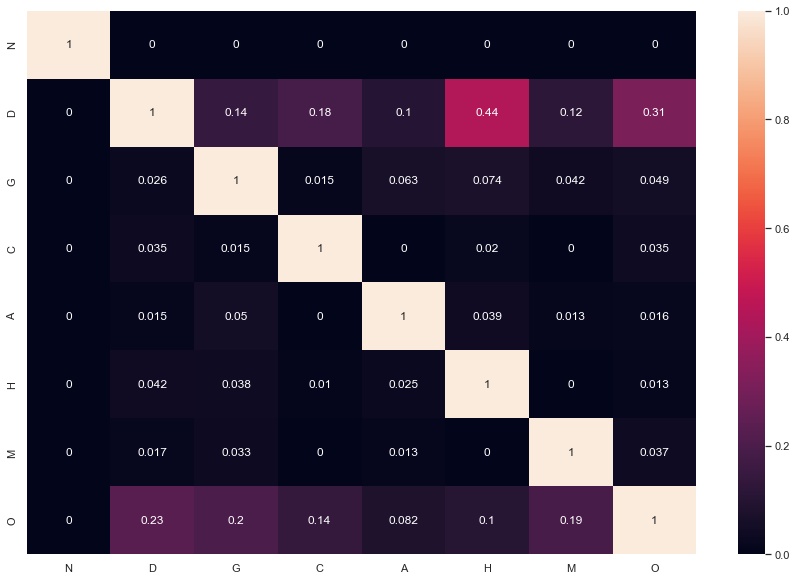

In [76]:
chart, ax = plt.subplots(figsize=[15,10])
sns.heatmap(data=correlation_2, annot=True)
plt.show()